In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go 
import plotly.express as px

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')

### PART 1: Data Understanding (Exploratory Data Analysis) 

In [2]:
df_before=pd.read_csv(r"C:\Users\akhil\ML tasks\diabetes_data.csv")

In [3]:
df_before.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,NaN,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [4]:
df_before.shape

(768, 9)

In [5]:
df_before.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               728 non-null    float64
 1   Glucose                   722 non-null    float64
 2   BloodPressure             735 non-null    float64
 3   SkinThickness             726 non-null    float64
 4   Insulin                   735 non-null    float64
 5   BMI                       729 non-null    float64
 6   DiabetesPedigreeFunction  734 non-null    float64
 7   Age                       735 non-null    float64
 8   Outcome                   739 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [6]:
df_before.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,728.000000,722.000000,735.000000,726.000000,735.000000,729.000000,734.000000,735.000000,739.000000
mean,3.912088,120.671745,68.927891,20.632231,80.268027,32.028807,0.467578,33.308844,0.341001
std,3.382204,31.982858,19.590744,16.012616,116.198612,7.904681,0.325979,11.727195,0.474367
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.238250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,29.000000,32.000000,0.368000,29.000000,0.000000
75%,6.000000,140.750000,80.000000,32.000000,130.000000,36.600000,0.622750,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df=df_before.copy()

### PART 2: Missing Value Imputation Using (Mean, Median, Mode)

In [8]:
df.isnull().sum()

Pregnancies                 40
Glucose                     46
BloodPressure               33
SkinThickness               42
Insulin                     33
BMI                         39
DiabetesPedigreeFunction    34
Age                         33
Outcome                     29
dtype: int64

In [9]:
(df.isnull().sum()/df.shape[0])*100

Pregnancies                 5.208333
Glucose                     5.989583
BloodPressure               4.296875
SkinThickness               5.468750
Insulin                     4.296875
BMI                         5.078125
DiabetesPedigreeFunction    4.427083
Age                         4.296875
Outcome                     3.776042
dtype: float64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               728 non-null    float64
 1   Glucose                   722 non-null    float64
 2   BloodPressure             735 non-null    float64
 3   SkinThickness             726 non-null    float64
 4   Insulin                   735 non-null    float64
 5   BMI                       729 non-null    float64
 6   DiabetesPedigreeFunction  734 non-null    float64
 7   Age                       735 non-null    float64
 8   Outcome                   739 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [11]:
# skewness

num_cols = df.select_dtypes(include=['int', 'float'])
for col in num_cols:
    print(col, ":", df[col].skew())

Pregnancies : 0.8778422362542826
Glucose : 0.15758158664483043
BloodPressure : -1.8442897268640224
SkinThickness : 0.11499672139966456
Insulin : 2.2727353044314134
BMI : -0.3757325099136468
DiabetesPedigreeFunction : 1.8592685177856
Age : 1.1131813986619248
Outcome : 0.6721806766272166


In [12]:
for i in df.columns:
    print(i,df[i].mean(),i,df[i].median())

Pregnancies 3.912087912087912 Pregnancies 3.0
Glucose 120.67174515235457 Glucose 117.0
BloodPressure 68.92789115646258 BloodPressure 72.0
SkinThickness 20.632231404958677 SkinThickness 23.0
Insulin 80.26802721088436 Insulin 29.0
BMI 32.02880658436214 BMI 32.0
DiabetesPedigreeFunction 0.4675776566757493 DiabetesPedigreeFunction 0.368
Age 33.308843537414965 Age 29.0
Outcome 0.34100135317997293 Outcome 0.0


> **Note:-**

- Even though the mean is slightly lower than the median.
What matters is skewness, and in positively skewed data, the mean gets pulled up by outliers, making it a less reliable measure of central tendency.

- So choosing the median is the standard, statistically correct choice.

In [13]:
df['Pregnancies']=df['Pregnancies'].fillna(df['Pregnancies'].median())

In [14]:
df['Glucose']=df['Glucose'].fillna(df['Glucose'].median())

In [15]:
df['BloodPressure']=df['BloodPressure'].fillna(df['BloodPressure'].mean())

In [16]:
df['SkinThickness']=df['SkinThickness'].fillna(df['SkinThickness'].median())

In [17]:
df['Insulin']=df['Insulin'].fillna(df['Insulin'].median())

In [18]:
df['BMI']=df['BMI'].fillna(df['BMI'].median())

In [19]:
df['DiabetesPedigreeFunction']=df['DiabetesPedigreeFunction'].fillna(df['DiabetesPedigreeFunction'].median())

In [20]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [21]:
df.isnull().sum()

Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                          0
DiabetesPedigreeFunction     0
Age                          0
Outcome                     29
dtype: int64

In [22]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,32.0,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,3.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0


#### Note:- 

> Logically Some of the values of features in the given dataset can't be zero, infact those features should have a minimum value >zero. Maybe we haven't received proper values for those features. And we need to caretake of those values to get accurate results i.e., imputing those values

- **Glucose:**
    - For people with diabetes in India, a general target is a fasting glucose between 80–130 mg/dL and a post-meal level under 180 mg/dL
- **BloodPressure:**
    -For a typical adult, a normal blood pressure range is considered to be less than \(120/80\) mmHg. Higher blood pressure is defined as a reading of (140/90\) mmHg or higher
- **Skin Thickness:**
    - Skin thickness for diabetes testing varies by individual and body site but generally ranges from 1.0 mm to 3.9 mm in healthy adults, though it can be thicker in some individuals, particularly those with diabetes. Factors like BMI, gender, age, and anatomical location influence skin thickness.
- **Insulin:**
    - Fasting Insulin Levels: 2-25 mU/L. Postprandial Insulin Levels (after eating): Varies based on meal size, but typically under 50 mU/L.
- **BMI:**
    - BMI (Body Mass Index) categorizes weight status based on height and weight. Ranges are: Underweight (BMI < 18.5), Normal weight (18.5 ≤ BMI <25), Overweight (25 ≤ BMI < 30), and Obese (BMI ≥ 30).
- **DiabetesPedigreeFunction:** 
    - The 'DiabetesPedigreeFunction' is a function that scores the probability of diabetes based on family history, with a realistic range of 0.08 to 2.42. Age has a realistic range from 21 to 81.

#### Note:- 
- >Let's impute the values of those features which are having zero values. So that data will be more meaningful or realistic

In [23]:
# count of observations with a value of zero after handling missing values

for i in df.columns:
    print(i,":",len(df[df[i]==0]),f"zero values out of {len(df)}",",",(((len(df[df[i]==0])/len(df)))*100),"%")

Pregnancies : 101 zero values out of 768 , 13.151041666666666 %
Glucose : 5 zero values out of 768 , 0.6510416666666667 %
BloodPressure : 35 zero values out of 768 , 4.557291666666666 %
SkinThickness : 214 zero values out of 768 , 27.864583333333332 %
Insulin : 359 zero values out of 768 , 46.74479166666667 %
BMI : 10 zero values out of 768 , 1.3020833333333335 %
DiabetesPedigreeFunction : 0 zero values out of 768 , 0.0 %
Age : 0 zero values out of 768 , 0.0 %
Outcome : 487 zero values out of 768 , 63.411458333333336 %


In [24]:
# skewness

num_cols = df.select_dtypes(include=['int', 'float'])
for col in num_cols:
    print(col, ":", df[col].skew())

Pregnancies : 0.9386433446749536
Glucose : 0.18353562428169876
BloodPressure : -1.88507175019527
SkinThickness : 0.09324030030326833
Insulin : 2.34825522439043
BMI : -0.3850398777143491
DiabetesPedigreeFunction : 1.930109709968545
Age : 1.1740951228015166
Outcome : 0.6721806766272166


In [25]:
# mean and median values after handling missing values

for i in df.columns:
    print(i,df[i].mean(),i,df[i].median())

Pregnancies 3.8645833333333335 Pregnancies 3.0
Glucose 120.45182291666667 Glucose 117.0
BloodPressure 68.92789115646258 BloodPressure 70.0
SkinThickness 20.76171875 SkinThickness 23.0
Insulin 78.06510416666667 Insulin 29.0
BMI 32.02734375 BMI 32.0
DiabetesPedigreeFunction 0.4631692708333333 DiabetesPedigreeFunction 0.368
Age 33.123697916666664 Age 29.0
Outcome 0.34100135317997293 Outcome 0.0


In [26]:
df[df['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1.0,0.0,48.0,20.0,0.0,24.7,0.140,22.0,0.0
182,1.0,0.0,74.0,20.0,23.0,27.7,0.299,21.0,0.0
342,1.0,0.0,68.0,35.0,0.0,32.0,0.389,22.0,0.0
349,5.0,0.0,80.0,32.0,0.0,41.0,0.346,37.0,1.0
502,6.0,0.0,68.0,41.0,0.0,39.0,0.727,41.0,1.0


In [27]:
df['Glucose']=df['Glucose'].replace(0,(df[df['Glucose']!=0])['Glucose'].median())

In [28]:
df['BloodPressure']=df['BloodPressure'].replace(0,(df[df['BloodPressure']!=0])['BloodPressure'].mean())

In [29]:
df['SkinThickness']=df['SkinThickness'].replace(0,(df[df['SkinThickness']!=0])['SkinThickness'].mean())

In [30]:
df['Insulin']=df['Insulin'].replace(0,(df[df['Insulin']!=0])['Insulin'].median())

In [31]:
df['BMI']=df['BMI'].replace(0,(df[df['BMI']!=0])['BMI'].median())

In [32]:
df.isnull().sum()

Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                          0
DiabetesPedigreeFunction     0
Age                          0
Outcome                     29
dtype: int64

#### Note:- 
- Still we've missing values in the target column called **outcome**. So let's handle that before going into Analysis

In [33]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,119.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.000000,119.0,32.0,0.351,31.0,0.0
2,8.0,183.0,64.0,28.781588,119.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.000000,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.000000,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.000000,180.0,32.9,0.171,63.0,0.0
764,3.0,122.0,70.0,27.000000,119.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.000000,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,28.781588,119.0,30.1,0.349,47.0,1.0


In [34]:
df.isnull().sum()

Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                          0
DiabetesPedigreeFunction     0
Age                          0
Outcome                     29
dtype: int64

In [35]:
df=df.dropna(subset=["Outcome"])

In [36]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [37]:
for i in df.columns:
    print("minimum value in",i,df[i].min(),"and","maximum value is",df[i].max())

minimum value in Pregnancies 0.0 and maximum value is 17.0
minimum value in Glucose 44.0 and maximum value is 199.0
minimum value in BloodPressure 24.0 and maximum value is 122.0
minimum value in SkinThickness 7.0 and maximum value is 99.0
minimum value in Insulin 14.0 and maximum value is 846.0
minimum value in BMI 18.2 and maximum value is 67.1
minimum value in DiabetesPedigreeFunction 0.078 and maximum value is 2.42
minimum value in Age 21.0 and maximum value is 81.0
minimum value in Outcome 0.0 and maximum value is 1.0


### PART 3: Visualizing Shape of features Before & After Imputation 

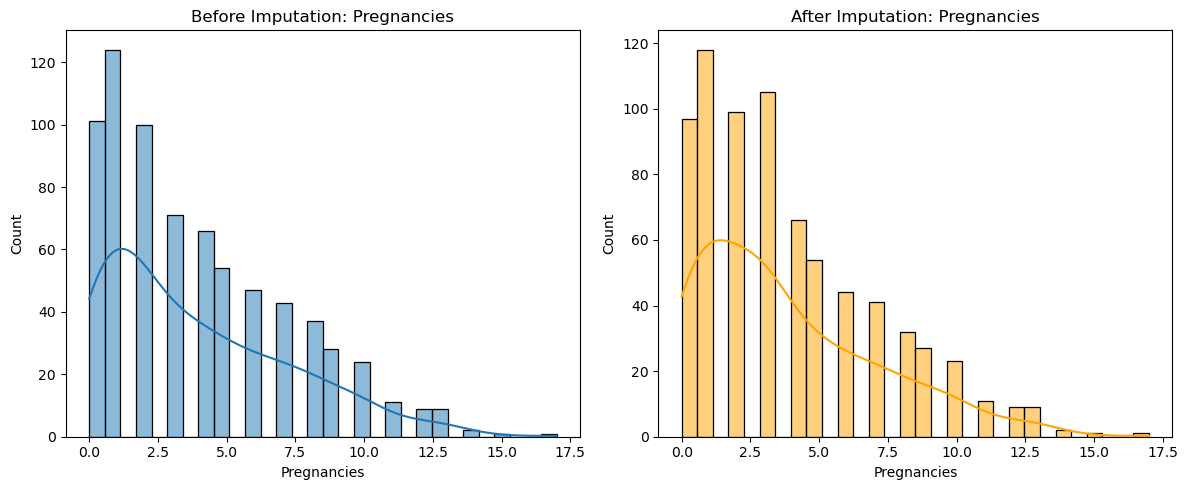

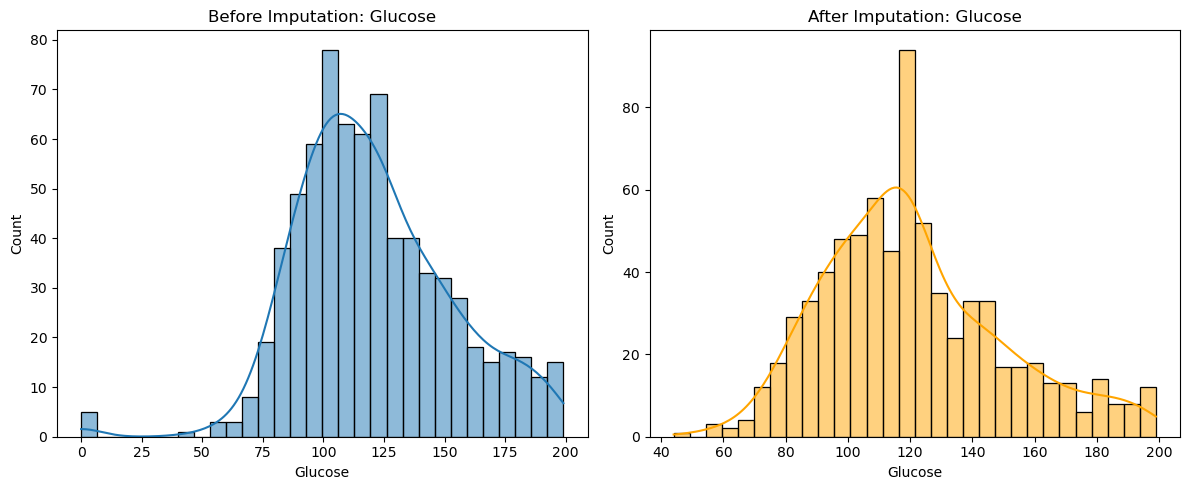

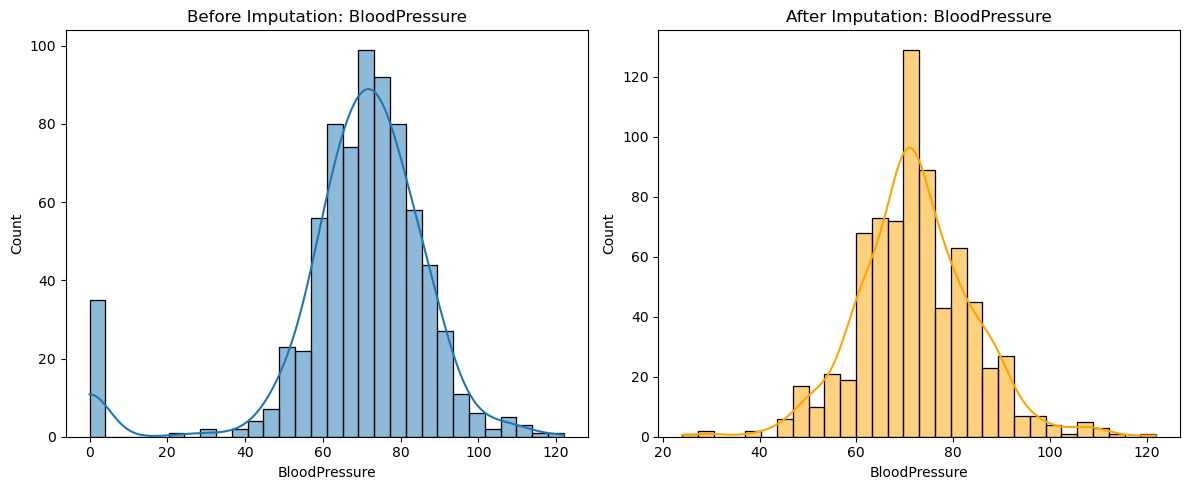

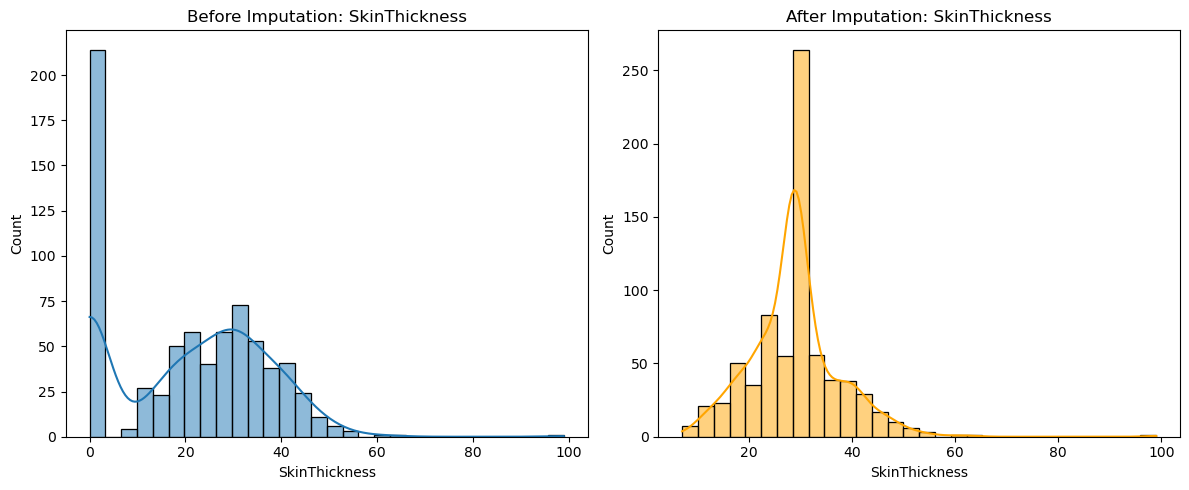

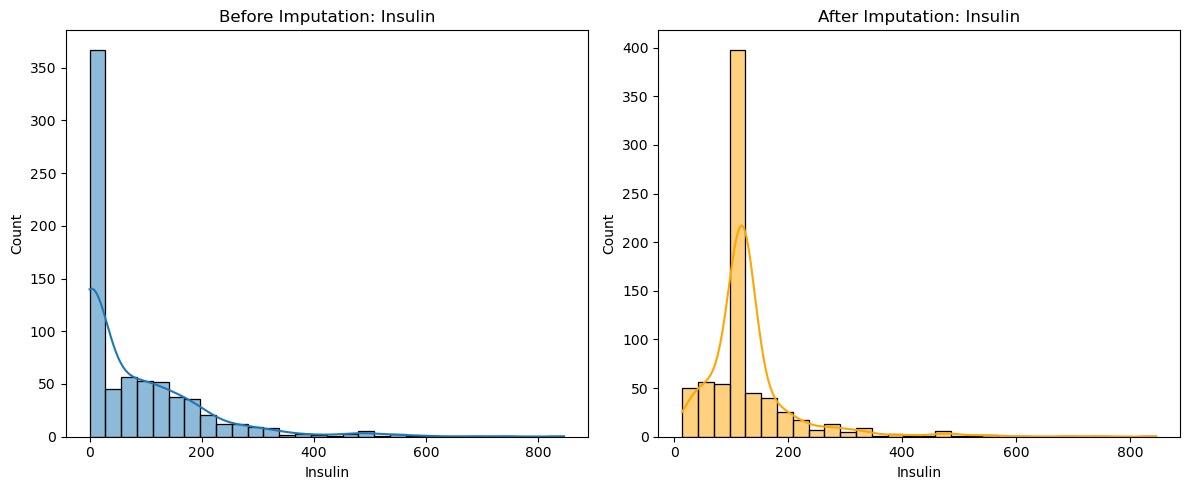

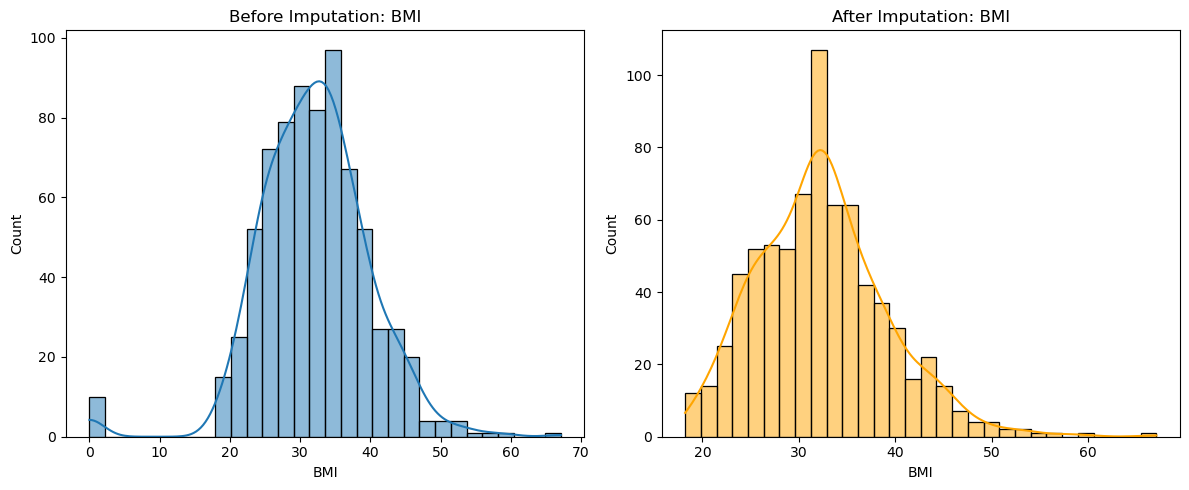

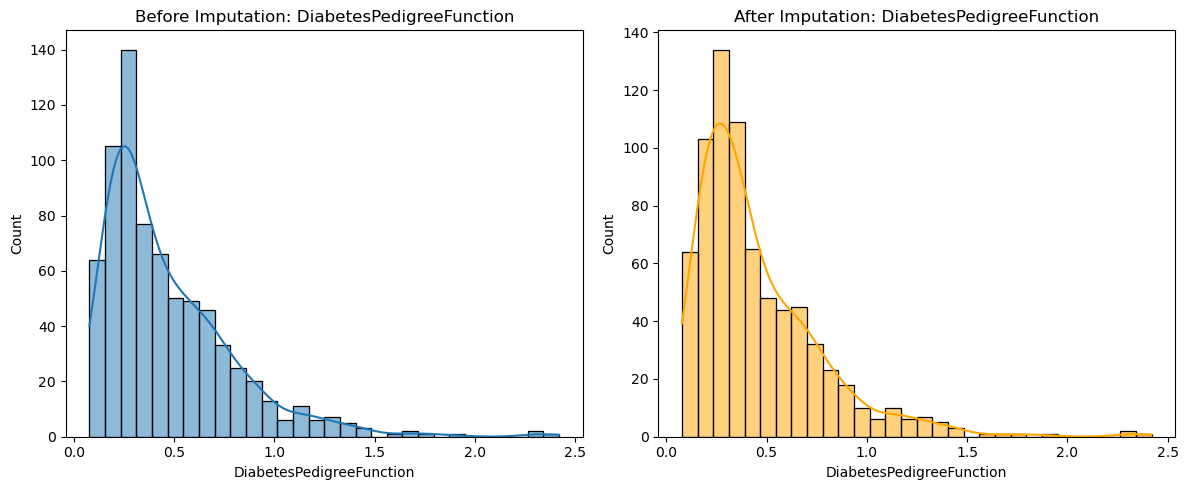

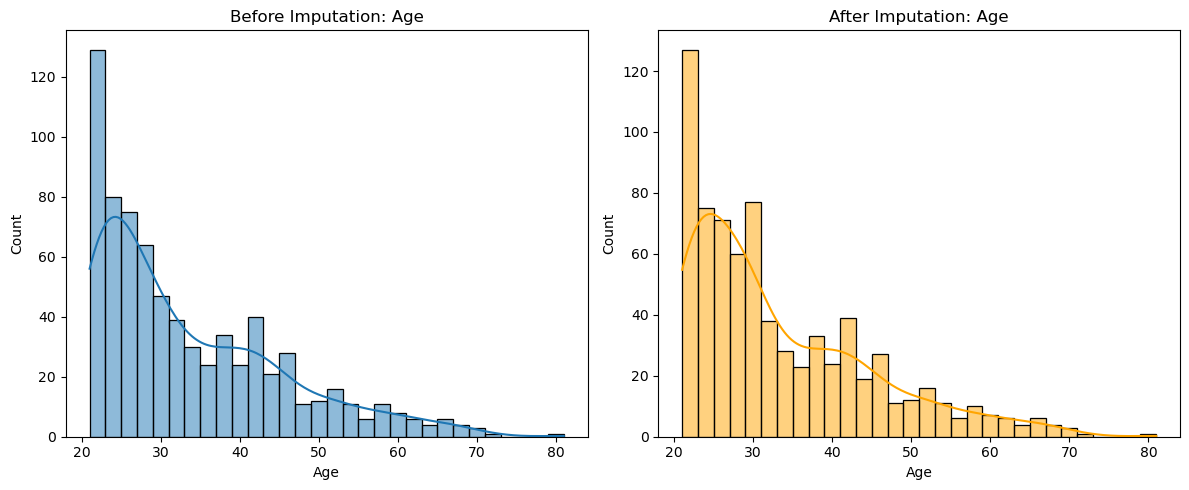

In [38]:
columns_to_plot = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                   'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for col in columns_to_plot:
    plt.figure(figsize=(12, 5))

    # BEFORE
    plt.subplot(1, 2, 1)
    sns.histplot(df_before[col], kde=True, bins=30)
    plt.title(f"Before Imputation: {col}");

    # AFTER
    plt.subplot(1, 2, 2)
    sns.histplot(df[col], kde=True, bins=30, color='orange')
    plt.title(f"After Imputation: {col}")

    plt.tight_layout()
plt.show();

#### Observations points for plots before and after handling null values and unrealisitic zeros

> pregnancies:-
- After imputation, bars around 0, 1, and 2 pregnancies appear slightly higher.
- The histogram before and after imputation is nearly identical, with only minor changes in the KDE smoothing line.
- This indicates that the imputation method successfully retained the original distribution shape without introducing bias.
- for pregnancies we've handled only null values and didn't fill zero values.

> Glucose:-
- The Before Imputation plot has a few very low glucose readings (near 0–50).
- The After Imputation plot shows fewer bars in that range, meaning:
  - Some extremely low values have been treated as missing and replaced becuase they are not realistic.
  
> Blood pressure:-
- The Before Imputation plot has a few very low Blood pressure readings (near 0–40).
- The After Imputation plot shows fewer bars in that range, meaning:
  - Some extremely low values have been treated as missing and replaced becuase they are not realistic.
- And also skewnesss to the left of the distribution has also been handled which you can by visualizing kde plots

> SkinThickess:-
- The unrealistic zero-dominated distribution before imputation is corrected.
- Imputation removes unrealistic zeros and replaces them with realistic mid-range values (~25–30).
- The post-imputation distribution becomes smooth
- The right side (values 50–100) looks similar in both plots.
- Imputation did not affect high values, preserving the natural variability.

> Insulin:-
- The unrealistic zero-dominated distribution before imputation is corrected.
- Imputation removes unrealistic zeros and replaces them with realistic mid-range values (~100 to 150).
- The post-imputation distribution becomes smooth
- The right side (values 400–800) looks similar in both plots.

> BMI:-
- The unrealistic zero-dominated distribution before imputation is corrected.
- Imputation removes unrealistic zeros and replaces them with realistic mid-range values (~30 to 40).
- The right side (values 0-15) have been handled after imputation which we can visualize using kde curve

> DiabetesPedigreeFunction :-
- There's a slight change in the distribution between (0 - 0.5) and shape of kde curve changed because of increase in values distribution (0 - 0.5)
- Imputation did not affect high values, preserving the natural variability.

> Age :-
- For this column we have handled only null values using median.
- Around (25-30) there's a slight increase in the distribution due to the missing values imputation using median 

### PART 4: Feature Scaling

#### **(i) MinMaxScaler**

In [39]:
columns_to_plot=df.drop('Outcome',axis=1).columns
columns_to_plot
len(columns_to_plot)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

8

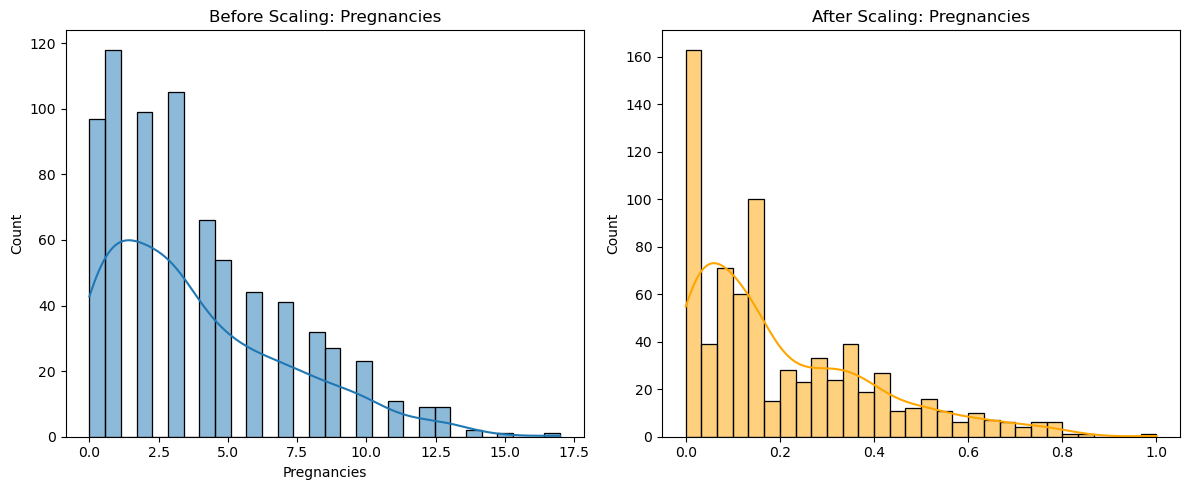

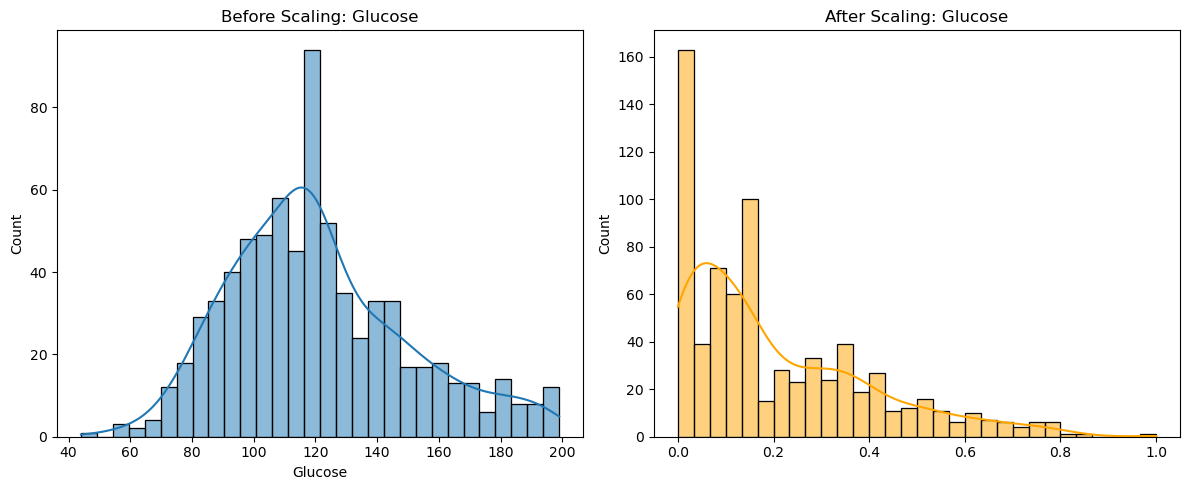

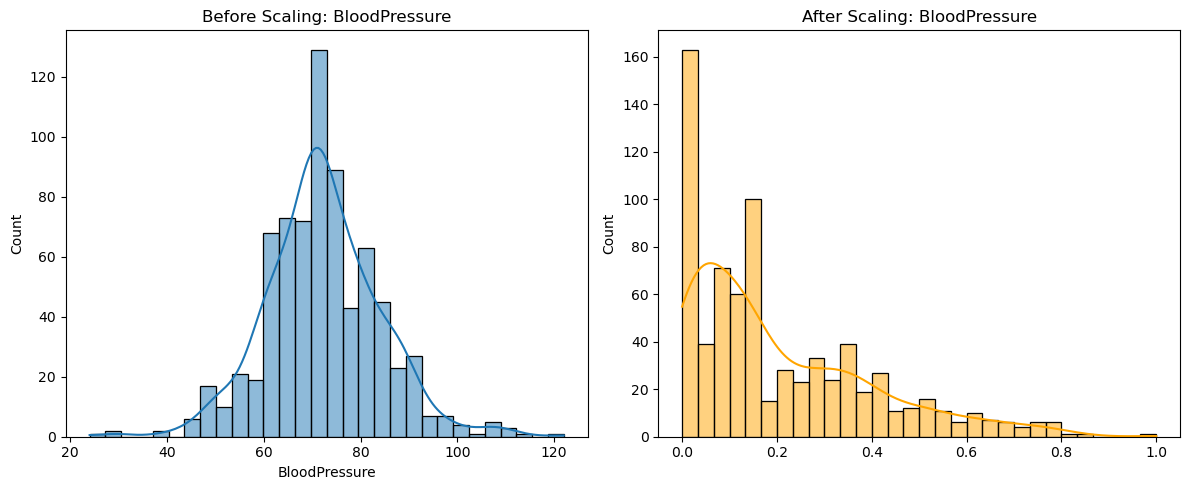

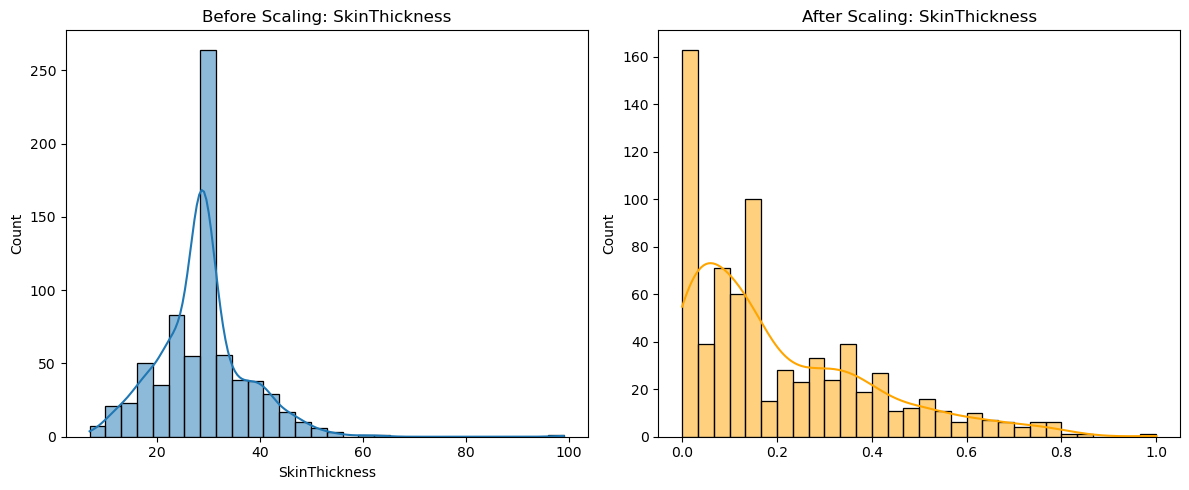

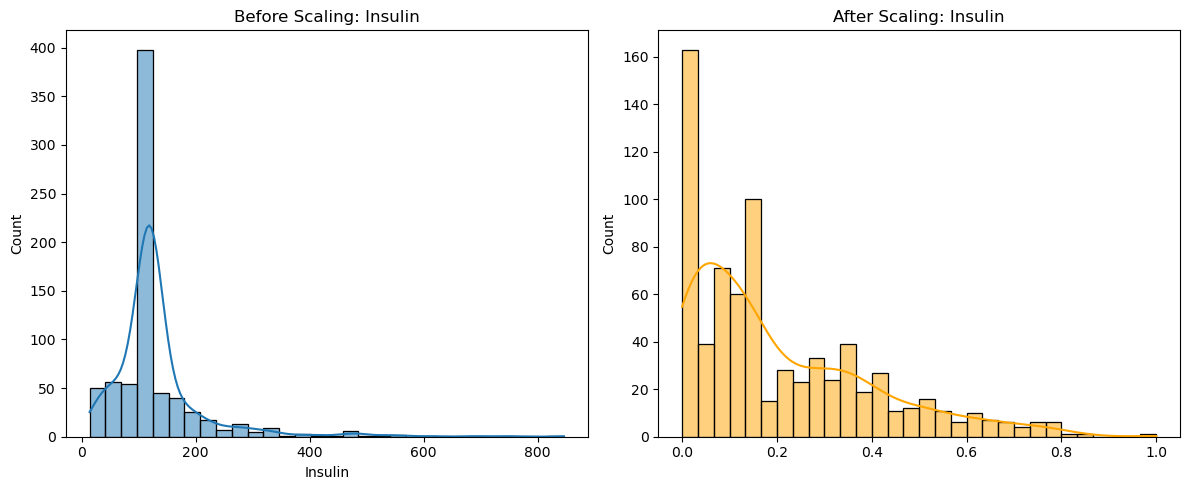

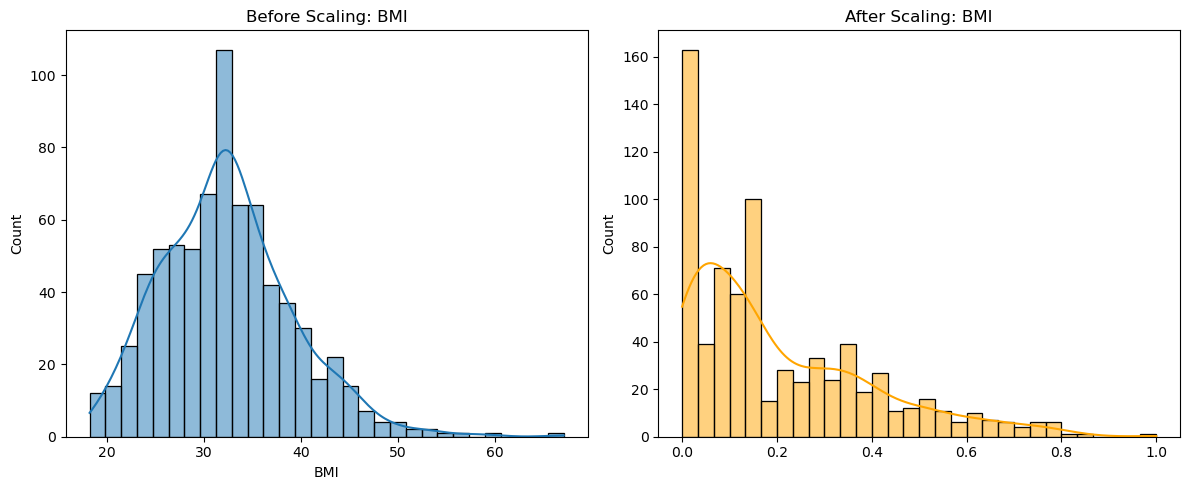

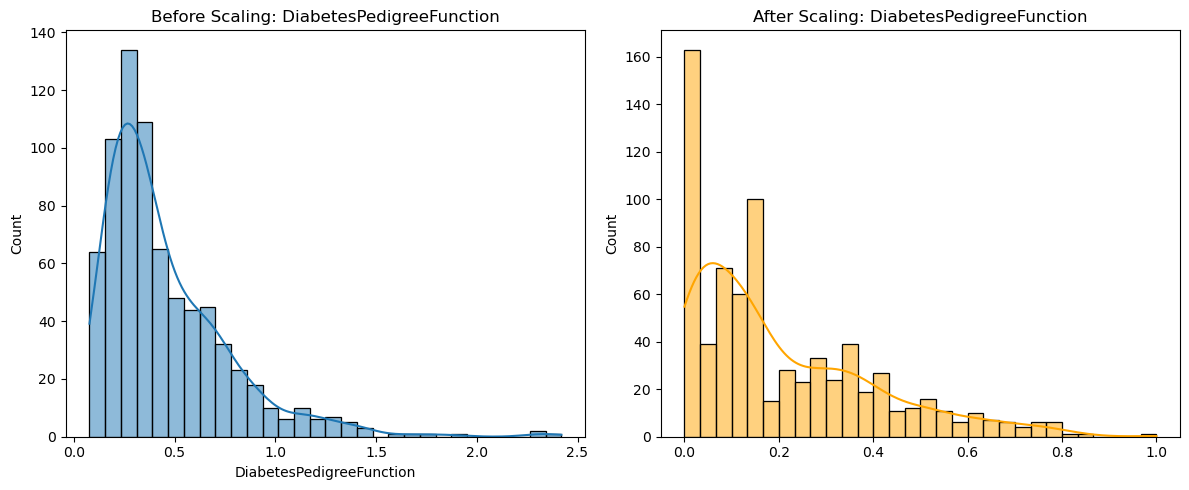

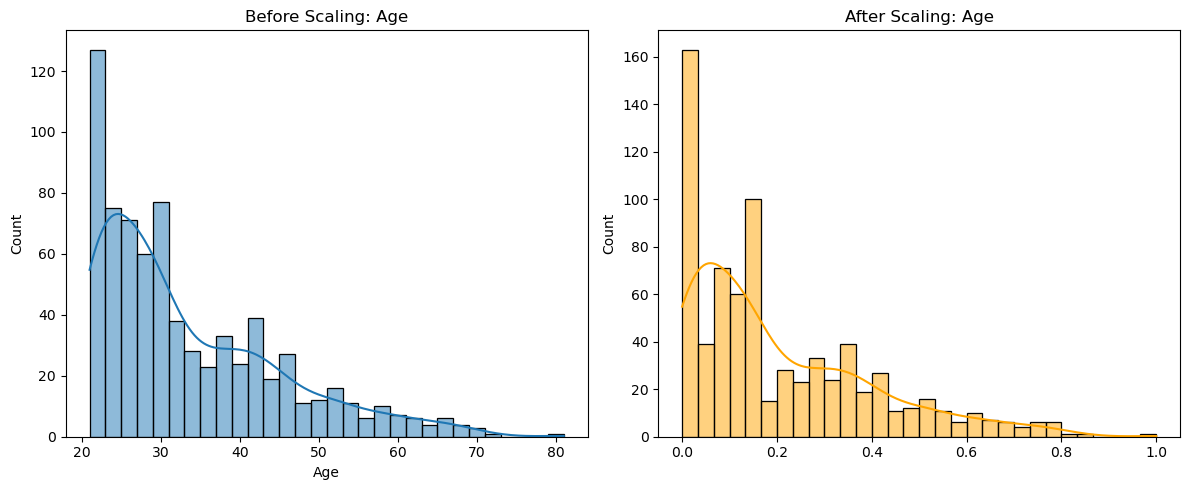

In [63]:
from sklearn.preprocessing import MinMaxScaler

for i in columns_to_plot:
    # Before
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[i], kde=True, bins=30)
    plt.title(f"Before Scaling: {i}")
    
    # After
    min_max=MinMaxScaler()
    minmax_scaled_data= min_max.fit_transform(df[[i]]).flatten() 
    plt.subplot(1, 2, 2)
    sns.histplot(minmax_scaled_df, kde=True, bins=30, color='orange')
    plt.title(f"After Scaling: {i}");
    plt.tight_layout()
  
plt.show();

In [98]:
X=df.drop(columns='Outcome')
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 739 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               739 non-null    float64
 1   Glucose                   739 non-null    float64
 2   BloodPressure             739 non-null    float64
 3   SkinThickness             739 non-null    float64
 4   Insulin                   739 non-null    float64
 5   BMI                       739 non-null    float64
 6   DiabetesPedigreeFunction  739 non-null    float64
 7   Age                       739 non-null    float64
dtypes: float64(8)
memory usage: 52.0 KB


In [99]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
transformer=ColumnTransformer(transformers=[("mm",MinMaxScaler(),[1,2,3,4,5,6,7])],remainder="passthrough")
minmax_scaled_df=transformer.fit_transform(X)

In [100]:
column_names=transformer.get_feature_names_out(X.columns)
minmax_scaled_df=pd.DataFrame(minmax_scaled_df,columns=column_names)
minmax_scaled_df.head()

,mm__Glucose,mm__BloodPressure,mm__SkinThickness,mm__Insulin,mm__BMI,mm__DiabetesPedigreeFunction,mm__Age,remainder__Pregnancies
0,0.670968,0.489796,0.304348,0.126202,0.314928,0.234415,0.483333,6.0
1,0.264516,0.428571,0.239130,0.126202,0.282209,0.116567,0.166667,1.0
2,0.896774,0.408163,0.236756,0.126202,0.104294,0.253629,0.183333,8.0
3,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,1.0
4,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,0.0


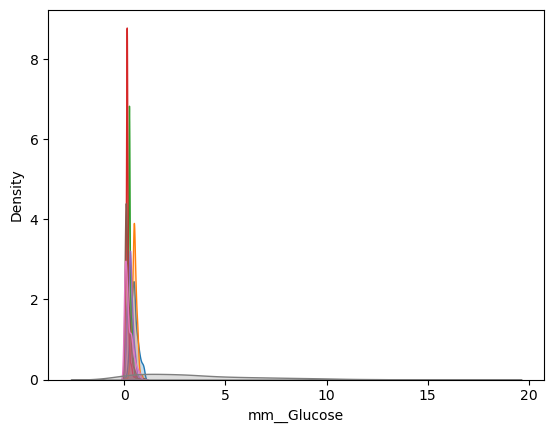

In [129]:
for i in minmax_scaled_df.columns:
    sns.kdeplot(minmax_scaled_df[i],fill=True)
plt.show();

#### **(ii) StandardScaler**

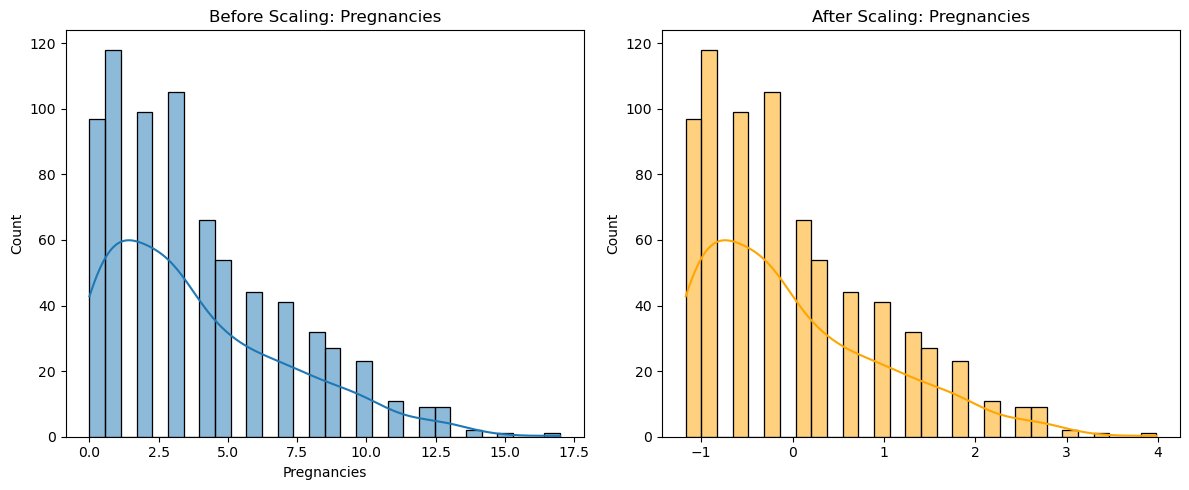

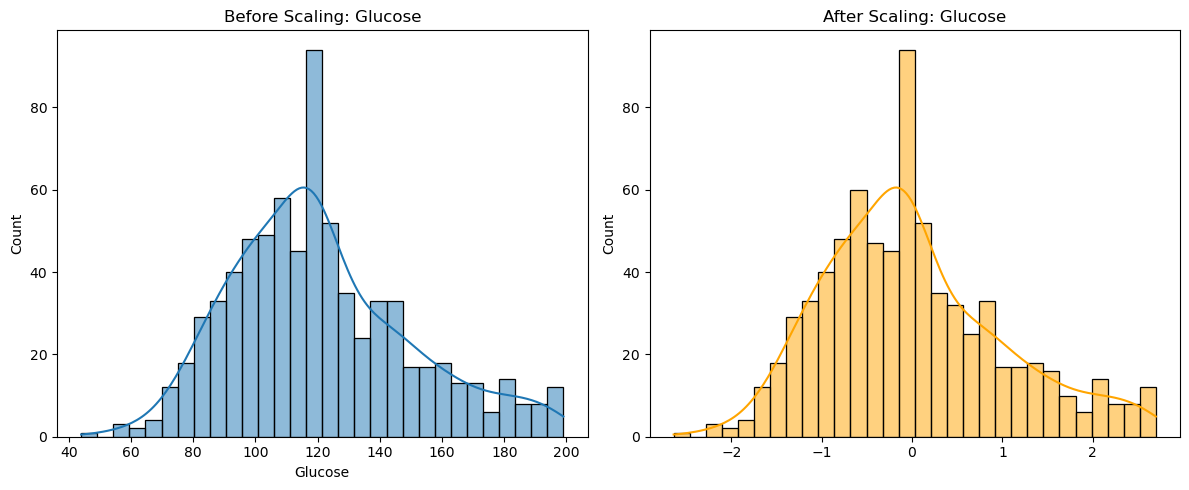

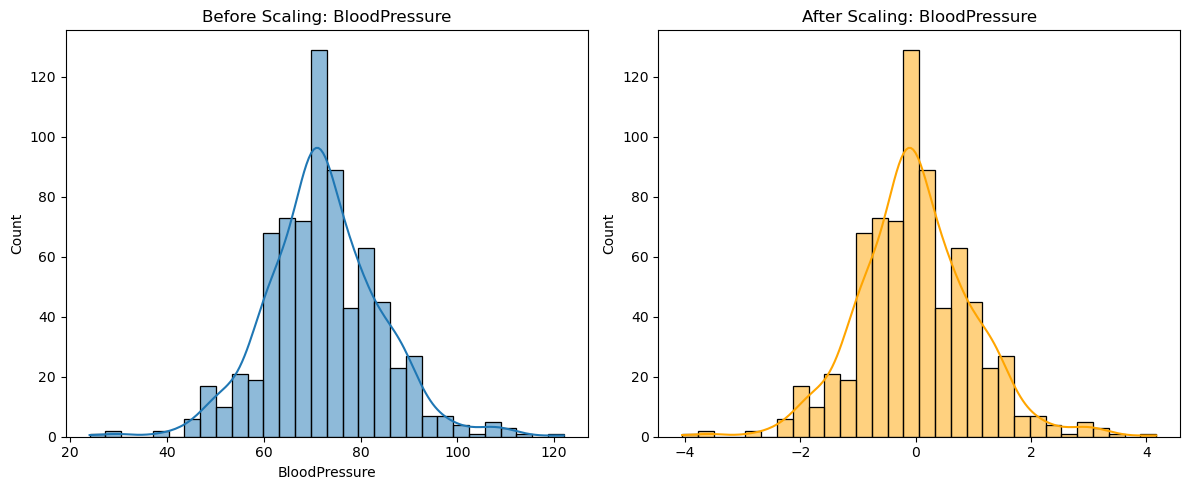

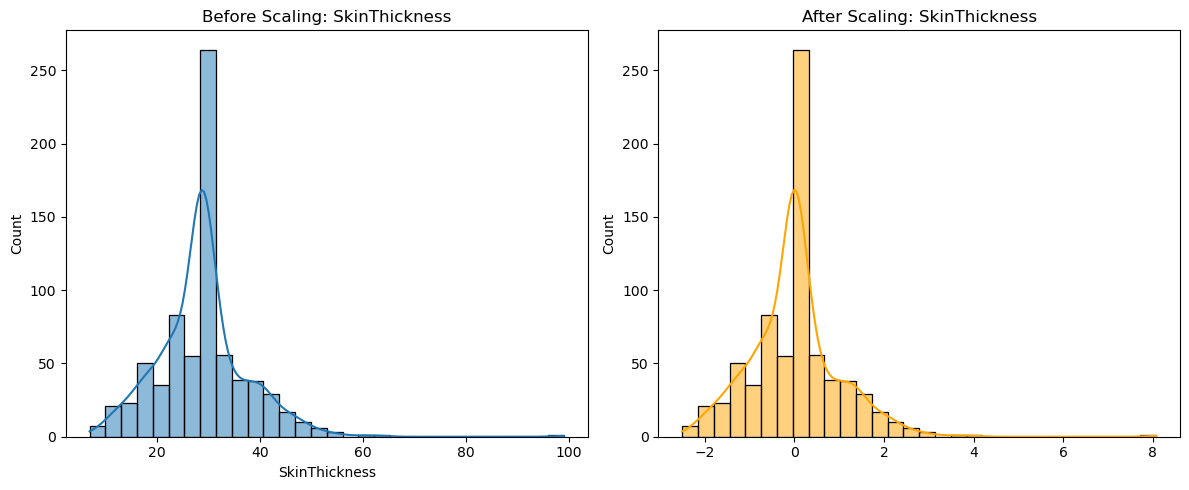

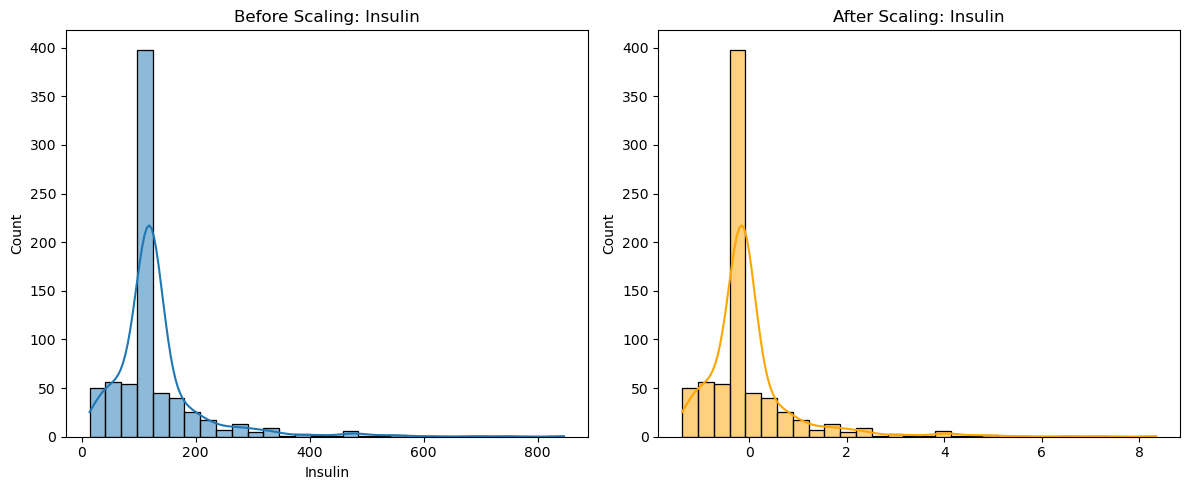

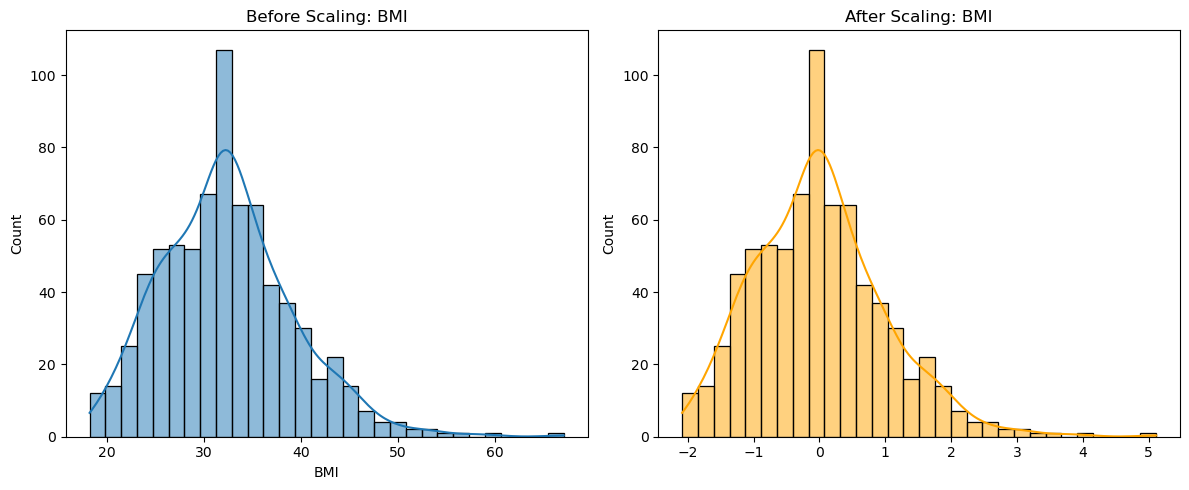

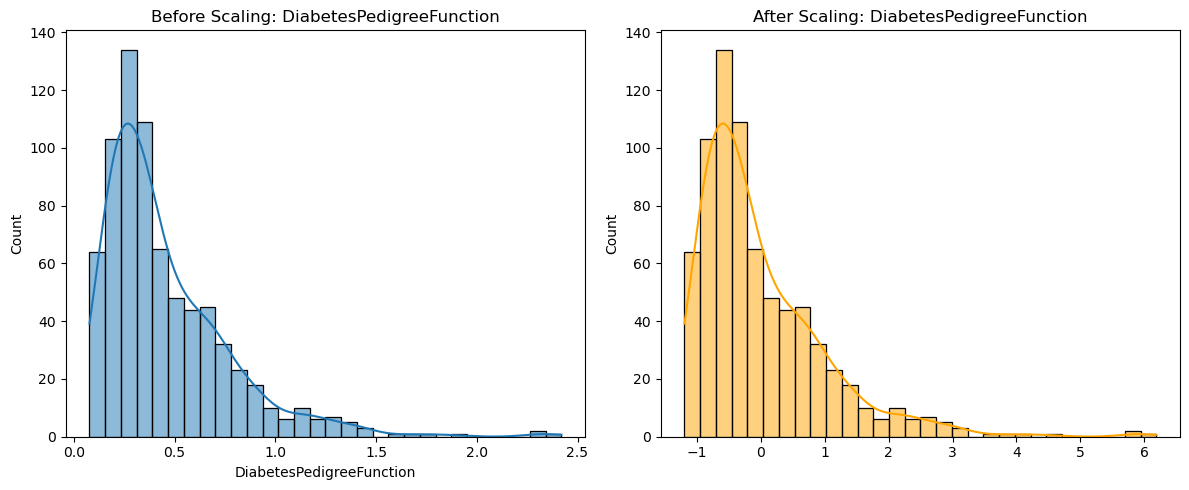

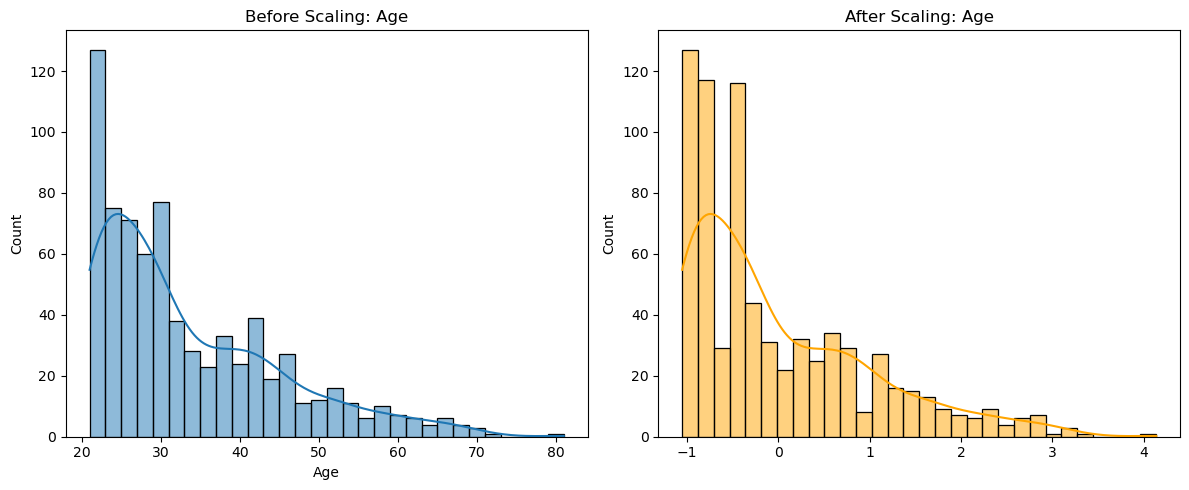

In [47]:
from sklearn.preprocessing import StandardScaler

for i in columns_to_plot:
    # Before
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[i], kde=True, bins=30)
    plt.title(f"Before Scaling: {i}")
    
    # After
    standard_scaler=StandardScaler()
    standard_scaled_df  = standard_scaler.fit_transform(df[[i]]).flatten() 
    plt.subplot(1, 2, 2)
    sns.histplot(standard_scaled_df , kde=True, bins=30, color='orange')
    plt.title(f"After Scaling: {i}");
    plt.tight_layout()
  
plt.show();

In [126]:
X=df.drop(columns='Outcome')
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 739 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               739 non-null    float64
 1   Glucose                   739 non-null    float64
 2   BloodPressure             739 non-null    float64
 3   SkinThickness             739 non-null    float64
 4   Insulin                   739 non-null    float64
 5   BMI                       739 non-null    float64
 6   DiabetesPedigreeFunction  739 non-null    float64
 7   Age                       739 non-null    float64
dtypes: float64(8)
memory usage: 52.0 KB


In [132]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
transformer=ColumnTransformer(transformers=[("ss",StandardScaler(),[1,2,3,4,5,6,7])],remainder="passthrough")
standard_scaled_df=transformer.fit_transform(X)

In [133]:
column_names=transformer.get_feature_names_out(X.columns)
standard_scaled_df=pd.DataFrame(standard_scaled_df,columns=column_names)
standard_scaled_df.head()

,ss__Glucose,ss__BloodPressure,ss__SkinThickness,ss__Insulin,ss__BMI,ss__DiabetesPedigreeFunction,ss__Age,remainder__Pregnancies
0,0.942502,-0.021482,0.714530,-0.149511,0.181546,0.535069,1.456323,6.0
1,-1.226986,-0.524878,0.024349,-0.149511,-0.054007,-0.335690,-0.188086,1.0
2,2.147774,-0.692677,-0.000775,-0.149511,-1.334828,0.677040,-0.101539,8.0
3,-1.089241,-0.524878,-0.665831,-0.441718,-0.628168,-0.916195,-1.053565,1.0
4,0.563703,-2.706264,0.714530,0.423213,1.580142,5.775395,-0.014991,0.0


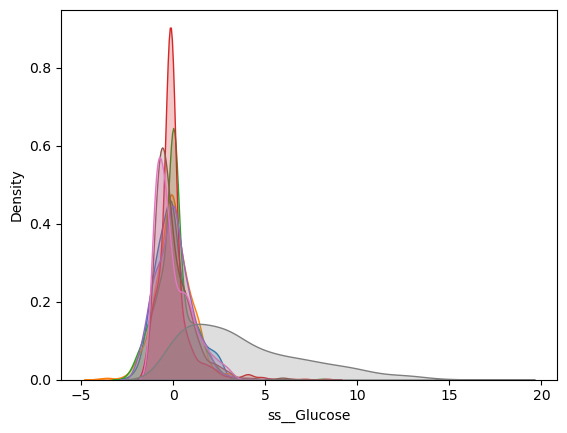

In [134]:
for i in standard_scaled_df.columns:
    sns.kdeplot(standard_scaled_df[i],fill=True)
plt.show();

#### **(iii) RobustScaler**

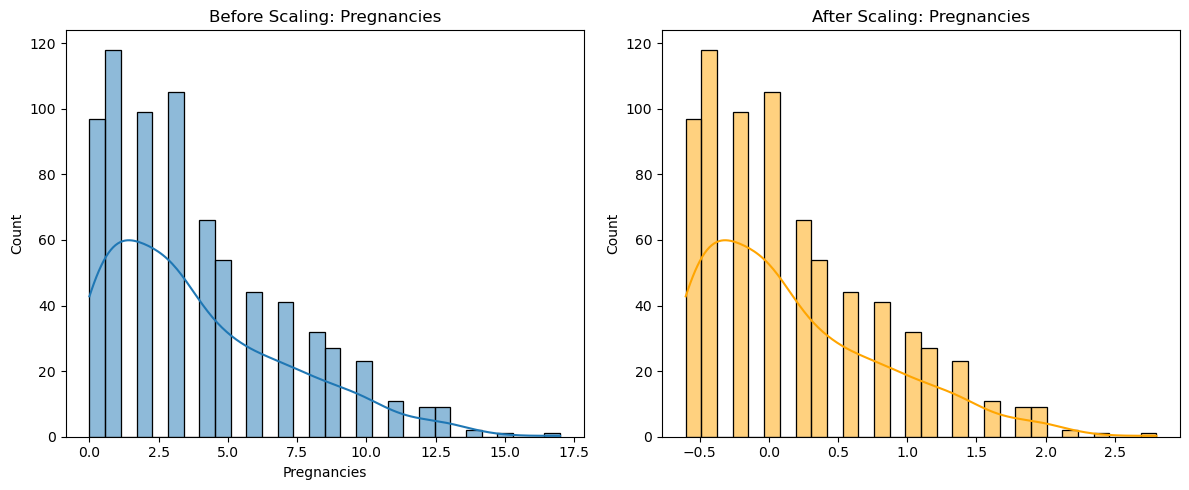

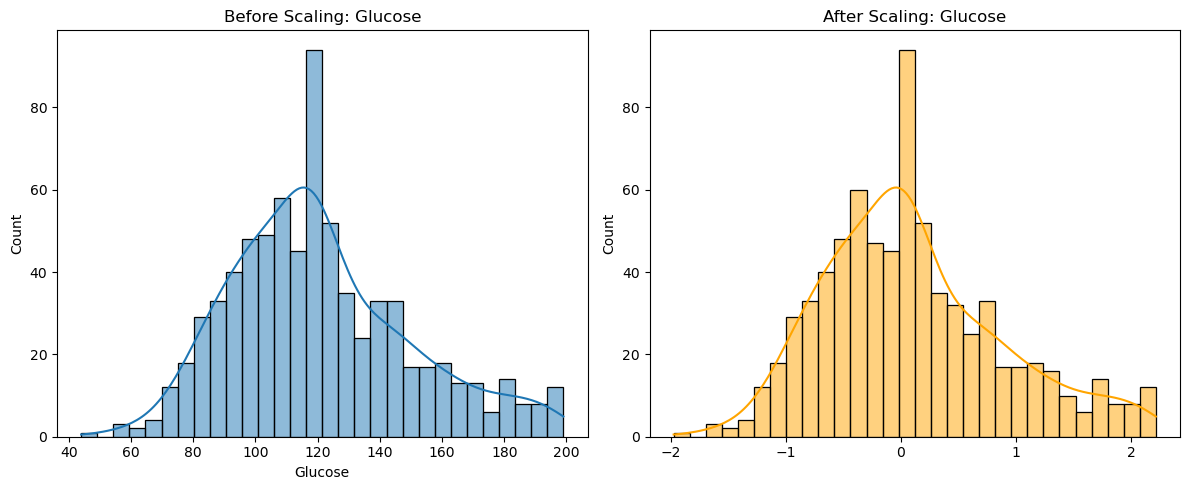

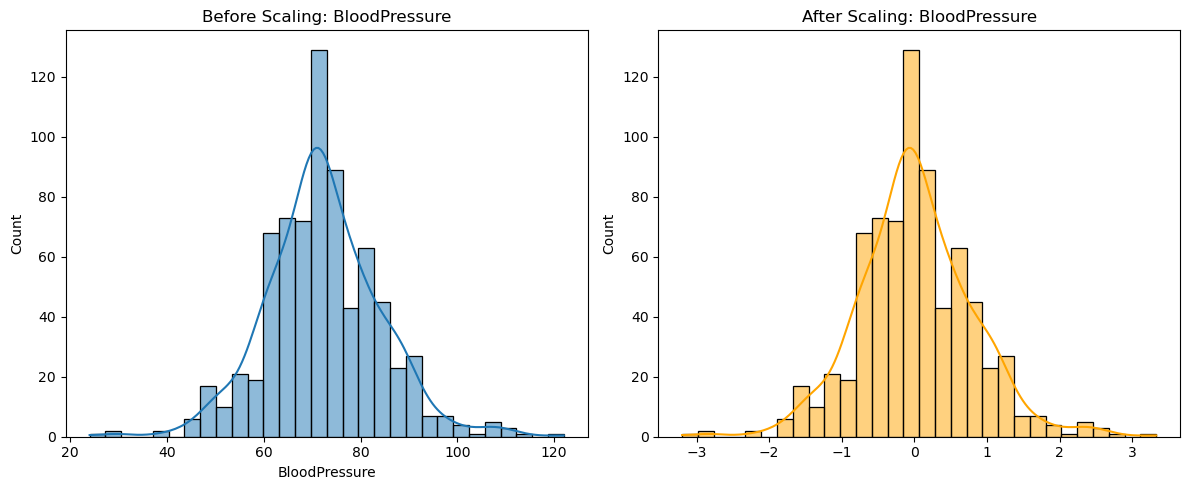

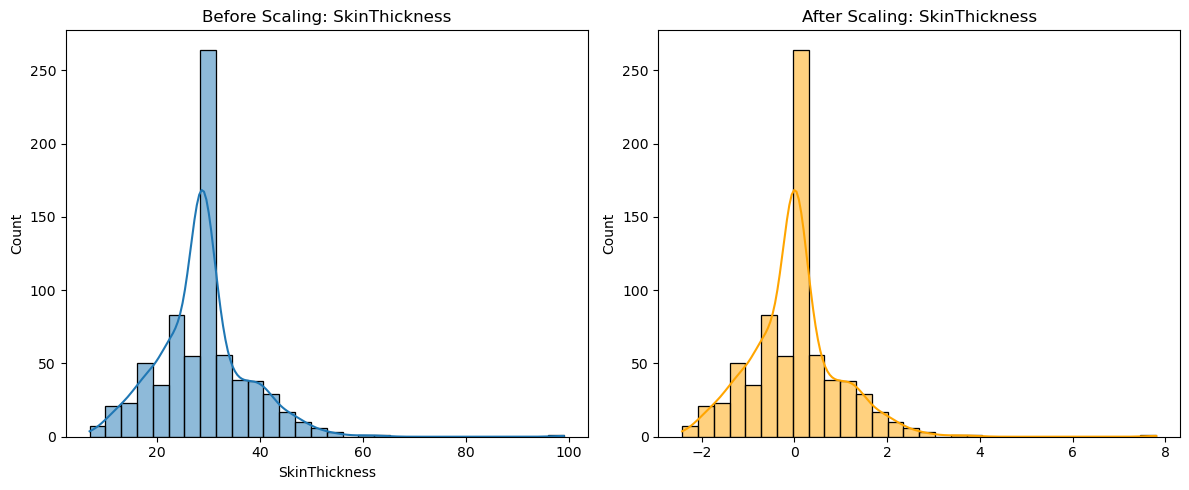

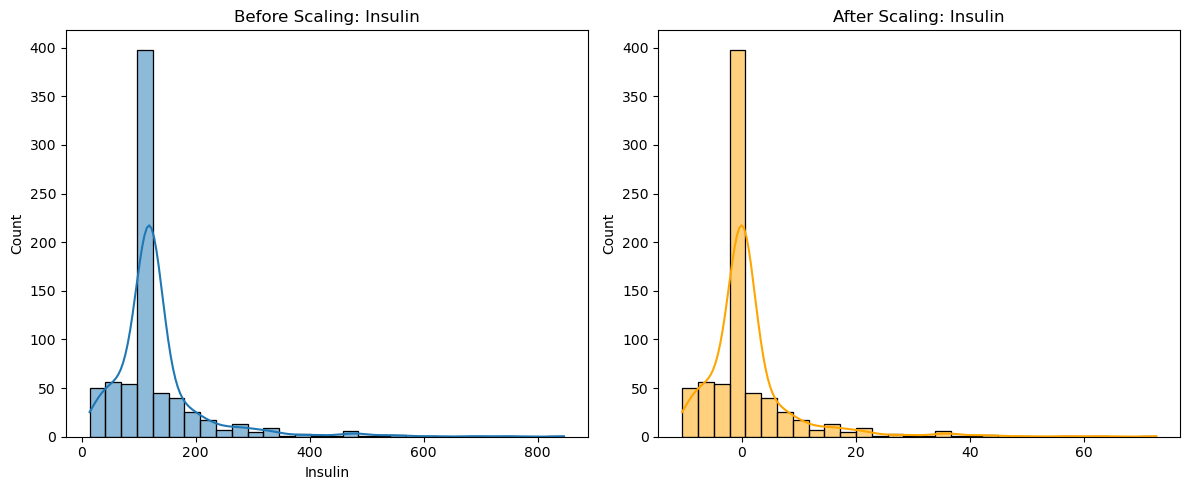

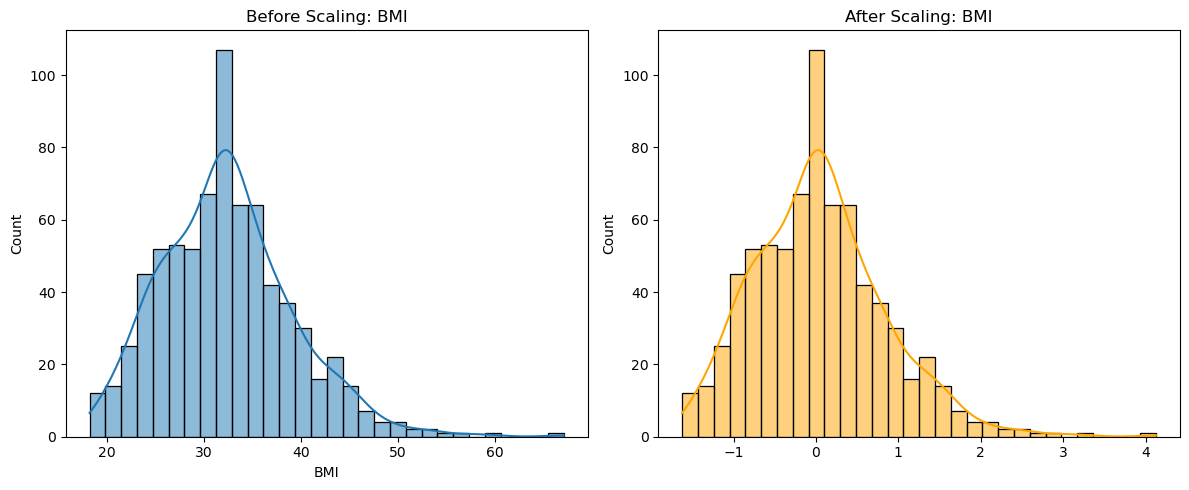

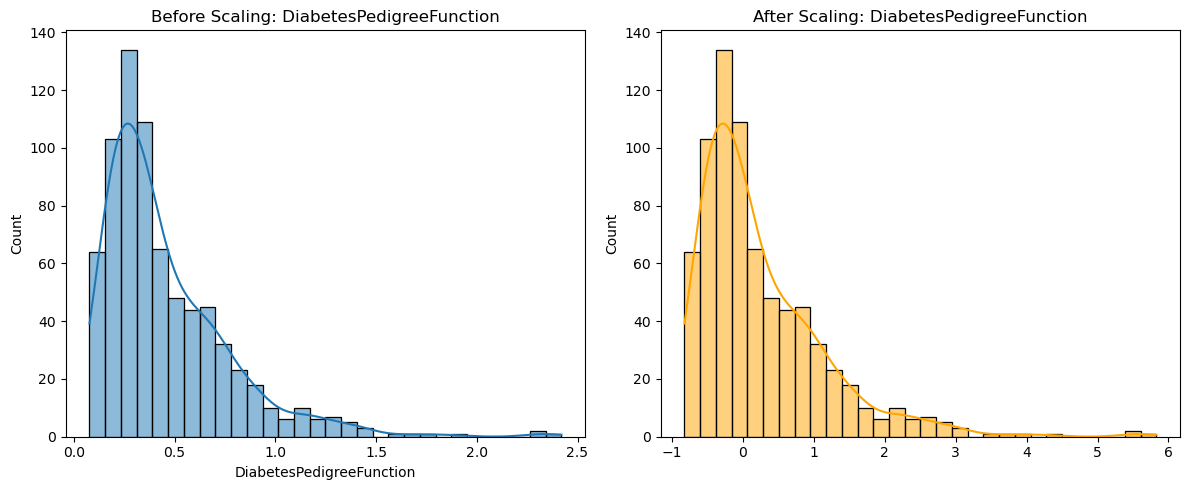

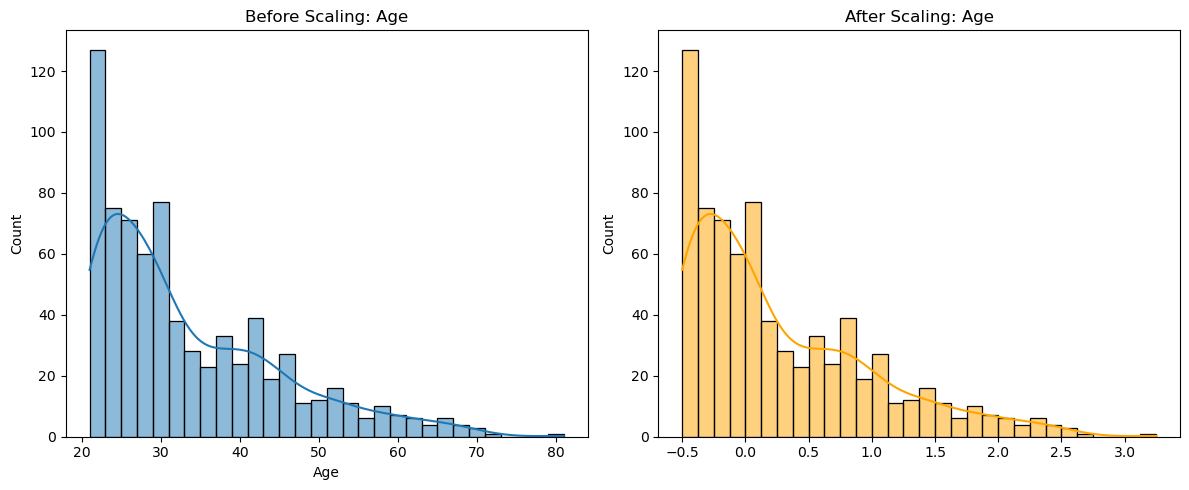

In [48]:
from sklearn.preprocessing import RobustScaler

for i in columns_to_plot:
    # Before
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[i], kde=True, bins=30)
    plt.title(f"Before Scaling: {i}")
    
    # After
    robust_scaler=RobustScaler()
    robust_scaled_df = robust_scaler.fit_transform(df[[i]]).flatten() 
    plt.subplot(1, 2, 2)
    sns.histplot(robust_scaled_df, kde=True, bins=30, color='orange')
    plt.title(f"After Scaling: {i}");
    plt.tight_layout()
  
plt.show();

In [127]:
X=df.drop(columns='Outcome')
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 739 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               739 non-null    float64
 1   Glucose                   739 non-null    float64
 2   BloodPressure             739 non-null    float64
 3   SkinThickness             739 non-null    float64
 4   Insulin                   739 non-null    float64
 5   BMI                       739 non-null    float64
 6   DiabetesPedigreeFunction  739 non-null    float64
 7   Age                       739 non-null    float64
dtypes: float64(8)
memory usage: 52.0 KB


In [122]:
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
transformer=ColumnTransformer(transformers=[("rs",RobustScaler(),[1,2,3,4,5,6,7])],remainder="passthrough")
robust_scaled_df=transformer.fit_transform(X)

In [124]:
column_names=transformer.get_feature_names_out(X.columns)
robust_scaled_df=pd.DataFrame(robust_scaled_df,columns=column_names)
robust_scaled_df.head()

,rs__Glucose,rs__BloodPressure,rs__SkinThickness,rs__Insulin,rs__BMI,rs__DiabetesPedigreeFunction,rs__Age,remainder__Pregnancies
0,0.837838,0.000000,0.690935,0.0,0.188235,0.735795,1.3125,6.0
1,-0.864865,-0.400000,0.024268,0.0,0.000000,-0.048295,0.1250,1.0
2,1.783784,-0.533333,0.000000,0.0,-1.023529,0.863636,0.1875,8.0
3,-0.756757,-0.400000,-0.642399,-2.5,-0.458824,-0.571023,-0.5000,1.0
4,0.540541,-2.133333,0.690935,4.9,1.305882,5.454545,0.2500,0.0


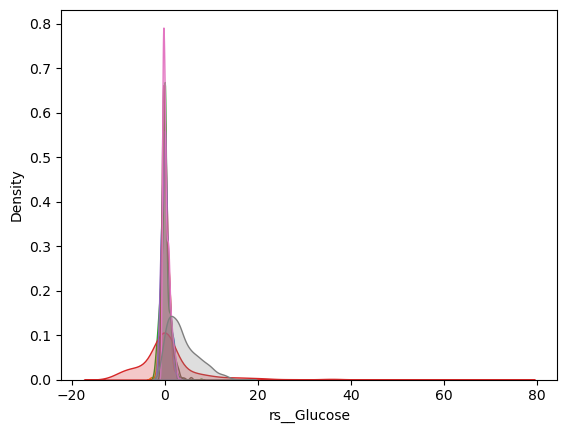

In [135]:
for i in robust_scaled_df.columns:
    sns.kdeplot(robust_scaled_df[i],fill=True)
plt.show();

#### Nte:- 

> **Feature scaling makes ML algorithms faster, more accurate, and more stable by keeping all features on a comparable scale.**

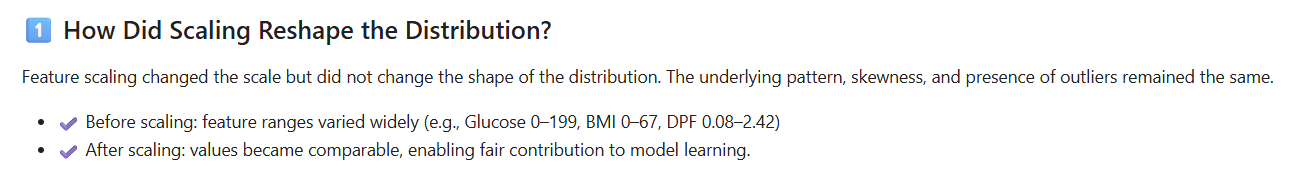

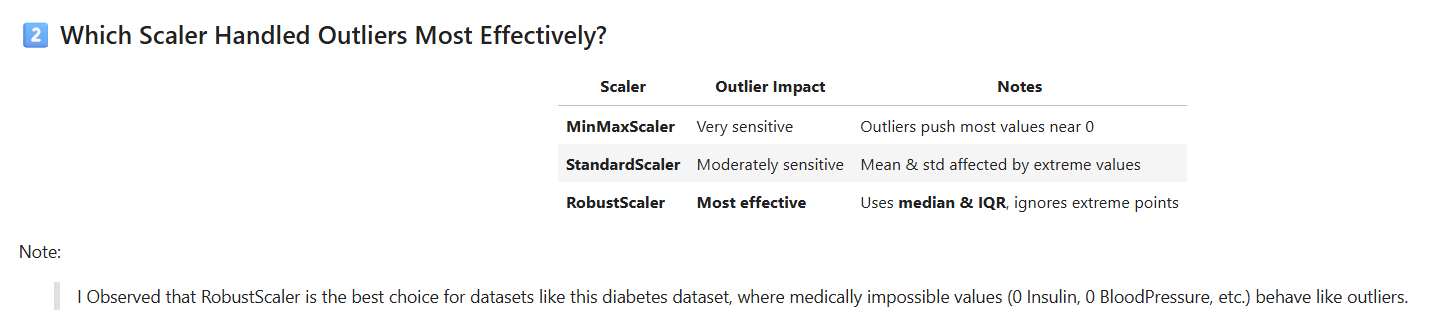

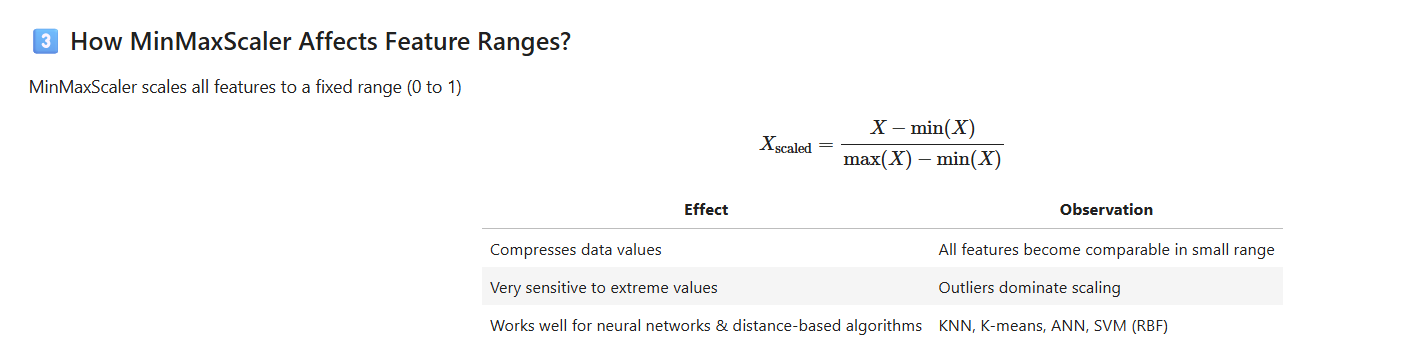

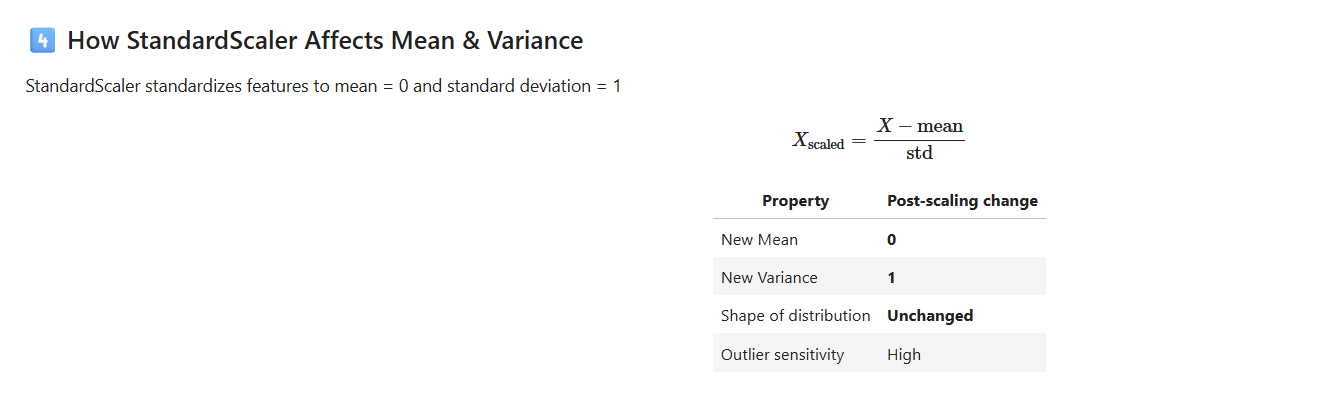

### 5.Saving the Final Outputs

In [140]:
minmax_scaled_df.to_csv(r"C:\Users\akhil\ML tasks\diabetes_minmax_scaled_df.csv", index=False)
standard_scaled_df.to_csv(r"C:\Users\akhil\ML tasks\diabetes_standard_scaled_df.csv", index=False)
robust_scaled_df.to_csv(r"C:\Users\akhil\ML tasks\diabetes_robust_scaled_df.csv", index=False)